In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv(r'C:\Users\khursheed alam\Downloads\Data Science Intern\advertising.csv')

****Exploratory Data Analysis****

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


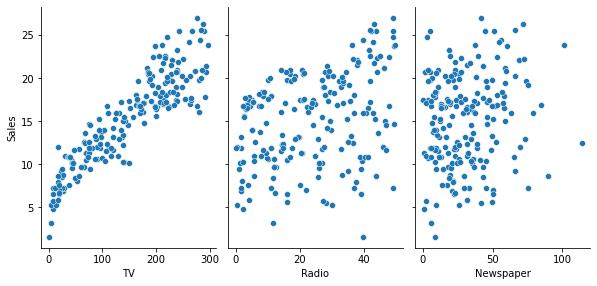

In [7]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=0.7)
plt.show()

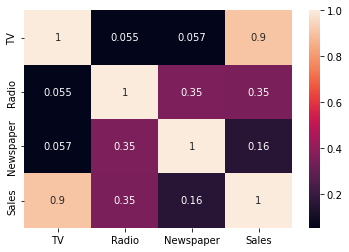

In [8]:
sns.heatmap(df.corr(), annot=True)
plt.show()

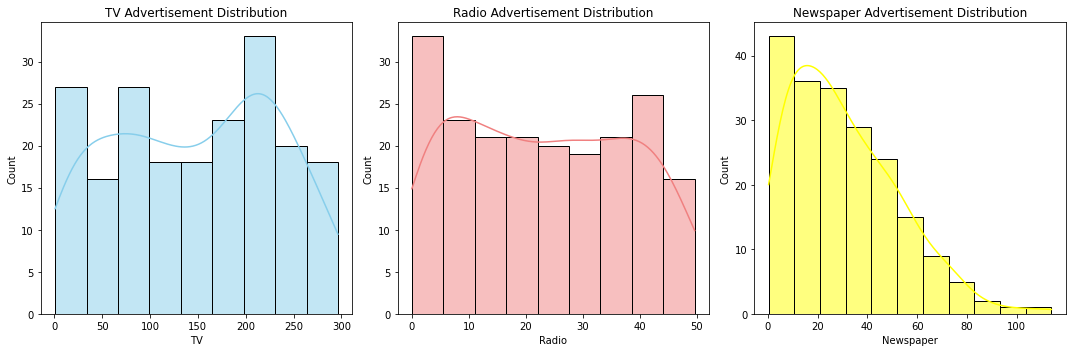

In [9]:

#Histplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['TV'], kde=True, color='skyblue')
plt.title('TV Advertisement Distribution')
plt.subplot(1, 3, 2)
sns.histplot(df['Radio'], kde=True, color='lightcoral')
plt.title('Radio Advertisement Distribution')
plt.subplot(1, 3, 3)
sns.histplot(df['Newspaper'], kde=True, color='yellow')
plt.title('Newspaper Advertisement Distribution')
plt.tight_layout()
plt.show()

**Model Training**

In [10]:
#Split the dataset
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [11]:
#Spliting into training and testig part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
#Train a Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

In [14]:
#Evaluate Linear Regression Model
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print("Linear Regression:")
print(f'Mean Squared Error: {linear_mse}')
print(f'R-squared: {linear_r2}')

Linear Regression:
Mean Squared Error: 2.9077569102710923
R-squared: 0.9059011844150826


In [15]:
#Train a Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [16]:
#Evaluate Random Forest Model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("\nRandom Forest Regression:")
print(f'Mean Squared Error: {rf_mse}')
print(f'R-squared: {rf_r2}')


Random Forest Regression:
Mean Squared Error: 1.4108747750000028
R-squared: 0.9543422475251689


In [17]:
#Train a Gradiant Boost Model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [18]:
#Evaluate Gradiant Boost Model
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print("\nGradient Boosting Regression:")
print(f'Mean Squared Error: {gb_mse}')
print(f'R-squared: {gb_r2}')


Gradient Boosting Regression:
Mean Squared Error: 1.2596876726321056
R-squared: 0.959234859838902


**Chossing Gradient boosting as model**

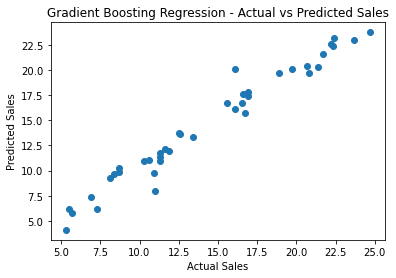

In [19]:
plt.scatter(y_test, gb_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Gradient Boosting Regression - Actual vs Predicted Sales')
plt.show()

**Testing**

In [20]:
# You can now use the trained model to predict sales for new data
new_data = pd.DataFrame({'TV': [200], 'Radio': [50], 'Newspaper': [10]})
predicted_sales = gb_model.predict(new_data)
print('Predicted Sales:', predicted_sales)

Predicted Sales: [24.03469816]
